# Publishers   

This page provides information about the publishers mentioned in the dataset. 

In [1]:
# === Imports === 

import re 
import seaborn as sns
from matplotlib import pyplot as plt
from os.path import join
from os.path import realpath, dirname
import os
from lxml import etree
from io import StringIO, BytesIO
from collections import Counter
import pandas as pd


# === Files and parameters === 

bibdatafile = join("data", "BIB18_Zotero-RDF_2024-01-02.rdf") 
#bibdatafile = join("data", "BIB18_Zotero-RDF_TEST.rdf") 


namespaces = {
    "foaf" : "http://xmlns.com/foaf/0.1/",
    "bib" : "http://purl.org/net/biblio#",
    "dc" : "http://purl.org/dc/elements/1.1/",
    "z" : "http://www.zotero.org/namespaces/export#",
    "rdf" : "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    }


bibdata = etree.parse(bibdatafile)

In [2]:
def get_publishers(bibdata): 
    # Find all the instances of publisher names
    publishers = []
    xpath = "//dc:publisher//foaf:name/text()"
    publishers = bibdata.xpath(xpath, namespaces=namespaces)    
    # Show some results
    print("There are " + str(len(publishers)) + " instances of publishers mentioned in the dataset." )
    print("There are a total of " + str(len(set(publishers))) + " different publishers mentioned in the dataset." )
    return publishers


def most_frequent_publishers(publishers):
    # Count the occurrences, find the 10 most frequently mentioned publishers
    publishernames_counts = Counter(publishers)
    publishernames_counts = dict(
        sorted(publishernames_counts.items(), 
        key = lambda item: item[1], reverse=True)[:20]
        )
    
    columns = ["occurrences"]
    publishernames_counts = pd.DataFrame.from_dict(
        publishernames_counts, 
        orient="index", 
        columns=["count"]).reset_index().rename({"index" : "publisher"}, 
        axis=1
        )
    return publishernames_counts


global publishernames_counts
publishers = get_publishers(bibdata)
publishernames_counts = most_frequent_publishers(publishers)

There are 37741 instances of publishers mentioned in the dataset.
There are a total of 5382 different publishers mentioned in the dataset.


## Visualization

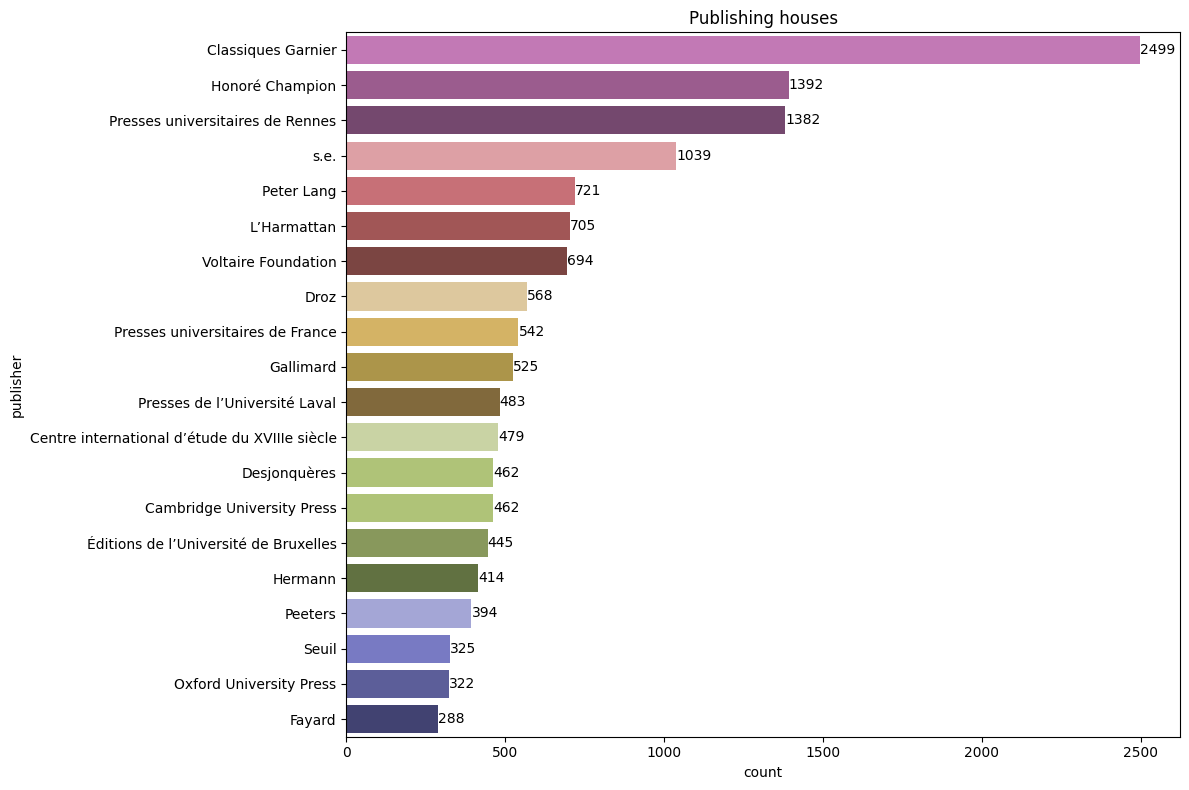

In [6]:

def visualize_publishername_counts(publishernames_counts): 
    plt.figure(figsize=(12,8))
    palette = sns.color_palette("tab20b", len(publishernames_counts)-1)
    fig = sns.barplot(
        data=publishernames_counts, 
        y="publisher", 
        x="count", 
        hue = "count",
        legend = False,
        orient='h',
        palette=palette
        )
    for i in fig.containers:
        fig.bar_label(i,)
    fig.set(title="Most frequently mentioned publishing houses")
    plt.tight_layout()
    plt.savefig(
        join("figures", "publishernames_counts.svg"),
        dpi=300
        )
    
visualize_publishername_counts(publishernames_counts)